# Using ConceptNet to get similarity between two concepts

## Setting

In [26]:
import requests
import numpy as np
import os
import glob
import pandas as pd

curfolder = os.getcwd()
answerfolder = curfolder + '/answer_data/'
answerfiles = glob.glob(answerfolder + '*.csv')

# load in one file
df = pd.read_csv(answerfiles[0])
# add a column exp and set values everywhere to 1 - tp keep track what part is it
df['exp'] = 1
df2 = pd.read_csv(answerfiles[1])
df2['exp'] = 2

# concept list
df_concepts = pd.read_excel(answerfolder + '/conceptlist_info.xlsx')

## Preparing dataframe

In [27]:

# merge df and df 2
df_all = pd.concat([df, df2], ignore_index=True)

# keep only columns word and answer
df = df_all[['word', 'answer', 'exp']]

# in df_concepts, keep only English and Dutch
df_concepts = df_concepts[['English', 'Dutch']]

# rename Dutch to word
df_concepts = df_concepts.rename(columns={'Dutch': 'word'})

# merge df and df_concepts on word
df = pd.merge(df, df_concepts, on='word', how='left')

# show rows where English is NaN
df[df['English'].isnull()]

# add translations manually for each
df.loc[df['word'] == 'bloem', 'English'] = 'flower'
df.loc[df['word'] == 'dansen', 'English'] = 'to dance'
df.loc[df['word'] == 'auto', 'English'] = 'car'
df.loc[df['word'] == 'olifant', 'English'] = 'elephant'
df.loc[df['word'] == 'comfortabel', 'English'] = 'comfortable'
df.loc[df['word'] == 'bal', 'English'] = 'ball'
df.loc[df['word'] == 'haasten', 'English'] = 'to hurry'
df.loc[df['word'] == 'gek', 'English'] = 'crazy'
df.loc[df['word'] == 'snijden', 'English'] = 'to cut'
df.loc[df['word'] == 'koken', 'English'] = 'to cook'
df.loc[df['word'] == 'juichen', 'English'] = 'to cheer'
df.loc[df['word'] == 'zingen', 'English'] = 'to sing'
df.loc[df['word'] == 'glimlach', 'English'] = 'smile'
df.loc[df['word'] == 'klok', 'English'] = 'clock'
df.loc[df['word'] == 'fiets', 'English'] = 'bicycle'
df.loc[df['word'] == 'vliegtuig', 'English'] = 'airplane'
df.loc[df['word'] == 'geheim', 'English'] = 'secret'
df.loc[df['word'] == 'telefoon', 'English'] = 'telephone'
df.loc[df['word'] == 'zwaaien', 'English'] = 'to wave'
df.loc[df['word'] == 'sneeuw', 'English'] = 'snow'

# in col English, replace 'to ' with ''
df['English'] = df['English'].str.replace('to ', '')

# make a list of English meanings
meanings_en = list(df['English'])
len(meanings_en)

# make a list of Dutch meanings
answers_nl = list(df['answer'])
answers_nl
len(answers_nl)

# make a list of English answers
answers_en = ['party', 'to cheer', 'tasty', 'to shoot', 'to breathe', 'zombie', 'bee', 'sea', 'dirty', 'tasty', 'car', 'to eat', 'to eat', 'to blow', 'hose', 'hose', 'to annoy', 'to make noise', 'to make noise', 'to run away', 'elephant', 'to cry', 'cold', 'outfit', 'silence', 'to ski', 'wrong', 'to play basketball', 'to search', 'disturbed', 'to run', 'to lick', 'to lift', 'lightning', 'to think', 'to jump', 'to fall', 'to write', 'to dance', 'shoulder height', 'horn', 'dirty', 'boring', 'to drink', 'strong', 'elderly', 'to mix', 'fish', 'fish', 'dirty', 'wrong', 'smart', 'to box', 'to box', 'dog', 'to catch', 'to cheer', 'to sing', 'pregnant', 'hair', 'to shower', 'pain', 'burnt', 'hot', 'I', 'to chew', 'bird', 'airplane', 'to fly', 'to think', 'to choose', 'to doubt', 'graffiti', 'fireworks', 'bomb', 'to smile', 'to laugh', 'smile', 'clock', 'to wonder', 'height', 'big', 'height', 'space', 'to misjudge', 'to wait', 'satisfied', 'happy', 'fish', 'to smell', 'wind', 'pain', 'to burn', 'hot', 'to cycle', 'to fly', 'airplane', 'bird', 'to crawl', 'to drink', 'waterfall', 'water', 'fire', 'top', 'good', 'to hear', 'to point', 'distance', 'there', 'to whisper', 'quiet', 'to be silent', 'telephone', 'to blow', 'to distribute', 'to give', 'cat', 'to laugh', 'tasty', 'to eat', 'yummy', 'to sleep', 'mountain', 'dirty', 'to vomit', 'to be disgusted', 'to greet', 'hello', 'goodbye', 'to smell', 'nose', 'odor', 'to fly', 'fireworks', 'to blow', 'to cut', 'pain', 'hot', 'to slurp', 'to throw', 'to fall', 'to fall', 'whistle', 'heartbeat', 'mouse', 'to hit', 'to catch', 'to grab', 'to throw', 'to fall', 'to shoot', 'circus', 'trunk', 'to fall', 'to fight', 'pain', 'to push open', 'to growl', 'to cut', 'to eat', 'knife', 'to slurp', 'to drink', 'drink', 'to eat', 'delicious', 'tasty', 'to cough', 'sick', 'to cry', 'to cry']
# replace 'to ' with ''
answers_en = [x.replace('to ', '') for x in answers_en]

len(answers_en)

# add those to df as answers_en
df['answer_en'] = answers_en

## ConceptNet API

In [3]:
def get_concept_data(concept):
    url = f"http://api.conceptnet.io/c/en/{concept}"
    response = requests.get(url).json()
    
    # Parse the JSON data and extract useful information
    for edge in response['edges']:
        print(f"Relation: {edge['rel']['label']}")
        print(f"Start: {edge['start']['label']}")
        print(f"End: {edge['end']['label']}")
        print(f"Weight: {edge['weight']}\n")

# Search for the concept 
get_concept_data('dog')


Relation: CapableOf
Start: dog
End: bark
Weight: 16.0

Relation: CapableOf
Start: A dog
End: guard your house
Weight: 10.392304845413264

Relation: RelatedTo
Start: dog
End: pet
Weight: 9.82975075981075

Relation: RelatedTo
Start: dog
End: animal
Weight: 9.410419756844005

Relation: AtLocation
Start: a dog
End: a kennel
Weight: 9.38083151964686

Relation: RelatedTo
Start: flea
End: dog
Weight: 9.02064299260313

Relation: RelatedTo
Start: dog
End: canine
Weight: 7.625745865159683

Relation: CapableOf
Start: A dog
End: be a pet
Weight: 7.483314773547882

Relation: IsA
Start: A dog
End: a loyal friend
Weight: 6.6332495807108

Relation: UsedFor
Start: a dog
End: companionship
Weight: 6.32455532033676

Relation: IsA
Start: a dog
End: pet
Weight: 6.0

Relation: CapableOf
Start: a dog
End: run
Weight: 6.0

Relation: AtLocation
Start: the dog
End: the table
Weight: 5.656854249492381

Relation: Desires
Start: a dog
End: a bone
Weight: 5.291502622129181

Relation: IsA
Start: a dog
End: mammal
We

## Similarity using numberbatch

In [5]:
# Load embeddings from a file

def load_embeddings(file_path):
    embeddings = {}
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            vector = np.array(values[1:], dtype='float32')
            embeddings[word] = vector
    return embeddings

# Cosine similarity
def cosine_similarity(vec1, vec2):
    dot_product = np.dot(vec1, vec2)
    norm_vec1 = np.linalg.norm(vec1)
    norm_vec2 = np.linalg.norm(vec2)
    return dot_product / (norm_vec1 * norm_vec2)

# Euclidian distance
def euclidean_distance(vec1, vec2):
    return np.linalg.norm(vec1 - vec2)



In [20]:
# Load embeddings
embeddings = load_embeddings('numberbatch-en.txt') # downloaded from https://github.com/commonsense/conceptnet-numberbatch?tab=readme-ov-file

# Get the vectors for the concepts
vec_dog = embeddings.get('dog')
vec_cat = embeddings.get('to-bark')

# Check if embeddings exist for both words
if vec_dog is not None and vec_cat is not None:
    # Calculate similarity and distance
    cosine_sim = cosine_similarity(vec_dog, vec_cat)
    euclidean_dist = euclidean_distance(vec_dog, vec_cat)
    print(f"Cosine Similarity: {cosine_sim}")
    print(f"Euclidean Distance: {euclidean_dist}")
else:
    print("One or both concepts not found in the embeddings.")


One or both concepts not found in the embeddings.


## Embeddings for concepts and answers

In [30]:
# get the embeddings for the words in the list meanings_en
word_embeddings_en = {}
for word in meanings_en:
    if word in embeddings:
        word_embeddings_en[word] = embeddings[word]

# get the embeddings for the words in the list answers_en
word_embeddings_ans = {}
for word in answers_en:
    if word in embeddings:
        word_embeddings_ans[word] = embeddings[word]

# calculate the similarity between the first word in the list meanings_en and first word in answers_en, second word in meanings_en and second word in answers_en, etc.
cosine_similarities = []
euclidean_distances = []

for i in range(len(meanings_en)):
    word1 = meanings_en[i]
    word2 = answers_en[i]
    vec1 = word_embeddings_en.get(word1)
    vec2 = word_embeddings_ans.get(word2)
    if vec1 is not None and vec2 is not None:
        cosine_sim = cosine_similarity(vec1, vec2)
        euclidean_dist = euclidean_distance(vec1, vec2)
        cosine_similarities.append(cosine_sim)
        euclidean_distances.append(euclidean_dist)
    else:
        cosine_similarities.append(None)
        euclidean_distances.append(None)


In [44]:
## add cosine similarities and euclidean distances to df
df['cosine_similarity'] = cosine_similarities
df['euclidean_distance'] = euclidean_distances

## Adding similarity survey

In [45]:
# load in excel similarity_en_survey
df_survey = pd.read_excel(answerfolder + '/similarity_en_survey.xlsx')

# get rid of Timestamp column
df_survey = df_survey.drop(columns='Timestamp')

# for each column, calculate the mean and save it to a df
df_survey_means = pd.DataFrame(df_survey.mean()).reset_index()

# separate the index, the first part is English, the second part is the answer_en
df_survey_means['English'] = df_survey_means['index'].str.split(' - ').str[0]
df_survey_means['answer_en'] = df_survey_means['index'].str.split(' - ').str[1]

# get rid of the index column
df_survey_means = df_survey_means.drop(columns='index')

# rename the column 0 to mean_similarity
df_survey_means = df_survey_means.rename(columns={0: 'mean_similarity'})

# change to lightning into lightning
df_survey_means.loc[df_survey_means['answer_en'] == 'to lightning', 'answer_en'] = 'lightning'
# phone to telephone
df_survey_means.loc[df_survey_means['answer_en'] == 'phone', 'answer_en'] = 'telephone'
# scent to odor
df_survey_means.loc[df_survey_means['answer_en'] == 'scent', 'answer_en'] = 'odor'

In [46]:
# replace string 'to ' with ''
df_survey_means['English'] = df_survey_means['English'].str.replace('to ', '')
# also in answer_en
df_survey_means['answer_en'] = df_survey_means['answer_en'].str.replace('to ', '')

In [47]:
# merge df_survey_means with df on English and answer_en
df_final = pd.merge(df, df_survey_means, on=['English', 'answer_en'], how='left')

# get rid of English 'to beat'
df_final = df_final[df_final['English'] != 'beat']
# and to weep
df_final = df_final[df_final['English'] != 'weep']

In [48]:
# show me the rows where mean_similarity is NaN
df_final[df_final['mean_similarity'].isnull()]

# mean_similarity of row where English is sharp and answer_en is pain is 4.0 (don't know why it's NaN)
df_final.loc[(df_final['English'] == 'sharp') & (df_final['answer_en'] == 'pain'), 'mean_similarity'] = 4.0

## Test correlation

In [50]:
# get rid of all lines where mean_similarity is 10.0
df_corr = df_final[df_final['mean_similarity'] != 10.0]

In [52]:
# run a correlation between cosine_similarity and mean_similarity
df_corr['cosine_similarity'].corr(df_corr['mean_similarity'])

0.7748545593527965

In [53]:
# run a correlation between euclidean_distance and mean_similarity
df_corr['euclidean_distance'].corr(df_corr['mean_similarity'])

-0.6986951829948619

<Axes: xlabel='cosine_similarity', ylabel='mean_similarity'>

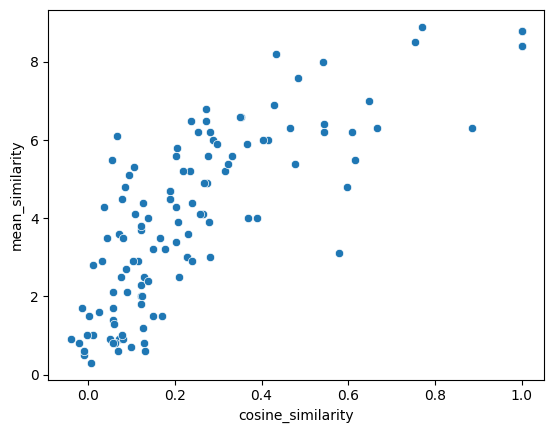

In [54]:
# plot it
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df_corr, x='cosine_similarity', y='mean_similarity')

In [56]:
# save the df_final
df_final.to_csv(answerfolder + '/df_final_conceptnet.csv', index=False)